<a href="https://colab.research.google.com/github/tiaxie/545-final/blob/main/545_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Spotify Data Project
We are analyzing Spotify music data. 

## Loading Packages and Data

In [ ]:
import pandas as pd
import ast
import numpy as np
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [ ]:
%%capture
!pip3 install lxml
!pip install pandasql
!pip install googledrivedownloader

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id = '1pLeRlNGHz5Lc8ROnyeNquCP0YYBGMIHL', dest_path = '/content/data_by_artist1.csv')
gdd.download_file_from_google_drive(file_id = '1pCkVO3Nh97C3BVdPOvCX33tWomXTsqpL', dest_path = '/content/data_by_year1.csv')
gdd.download_file_from_google_drive(file_id = '1iZRbF3gLc23nhfXDsSd5nUlFJpVeHSgy', dest_path = '/content/data_by_genres1.csv')
gdd.download_file_from_google_drive(file_id = '1KSw_DUZTFCTnM7zsfW503xC6_s3Aph9K', dest_path = '/content/data_w_genres1.csv')
gdd.download_file_from_google_drive(file_id = '15wuShEkIAItil2XFwKZvPdT8BYo12h4u', dest_path = '/content/data1.csv')

In [ ]:
df_main = pd.read_csv('data1.csv')
df_artist = pd.read_csv('data_by_artist1.csv')
df_year = pd.read_csv('data_by_year1.csv')
df_w_genres = pd.read_csv('data_w_genres1.csv')
df_by_genres = pd.read_csv('data_by_genres1.csv')

### Viewing Data

In [ ]:
df_main.head(5)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [ ]:
df_artist.head(5)

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5


In [ ]:
df_year.head(5)

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


In [ ]:
df_w_genres.head(5)

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


In [ ]:
df_by_genres.head(5)

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


### Formatting

In [ ]:
def toList(x):
  x = ast.literal_eval(x)
  x = [n.strip() for n in x]
  return x
df_main['artists'] = df_main['artists'].apply(lambda x: toList(x))
df_main['main_artist'] = df_main['artists'].apply(lambda x: x[0])

## Most Popular Artists
We want to use WordCloud and see some of the most frequent artists on Spotify. Classical musician such as Beethoven appeared very often! Aside from him, we can also see musicians such as Bob Dylan and the Beetles. A lot of the new pop artists can't be spotted probably because they haven't released a lot of musich yet.

In [ ]:
artist_sort_by_popularity = df_artist.sort_values('popularity', ascending=False)

In [ ]:
artist_sort_by_popularity = artist_sort_by_popularity.head(500)

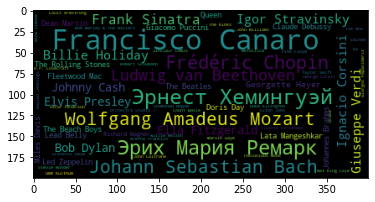

In [ ]:
most_artist = Counter(df_main['main_artist'])
highest_wordcloud = WordCloud().generate_from_frequencies(most_artist)
plt.imshow(highest_wordcloud)

## Correlation b/w song's popularity and its intrinsic characteristics
Then, we want to see what intrinsic factors of a song have high correlation with a song's popularity. From the graph below, we can see that key has almost no correlation. There seems to be some correlation for duration and energy

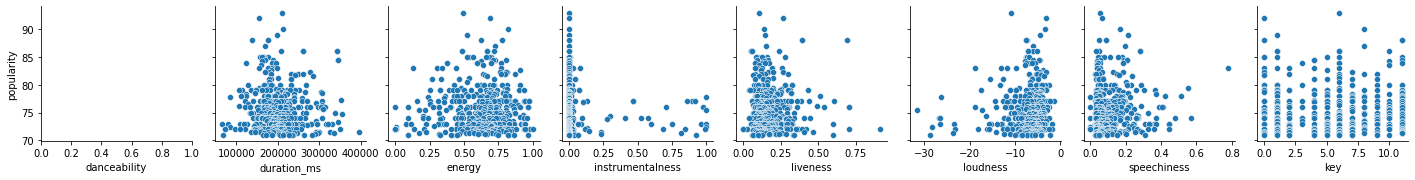

In [ ]:
g = sns.pairplot(artist_sort_by_popularity, 
                 x_vars=["danceability","duration_ms","energy", "instrumentalness", "liveness", "loudness", "speechiness", "key"],
                 y_vars=["popularity"])

plt.show()

## Time Analysis

Here, we are doing time analysis. First, we can see that the number of tracks available on Spotify fluctuate a lot from 1960 - 2020 (in terms of when the song was released). This probably explains why artists like the Beatles from 60s' appeared very often!

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'Year')

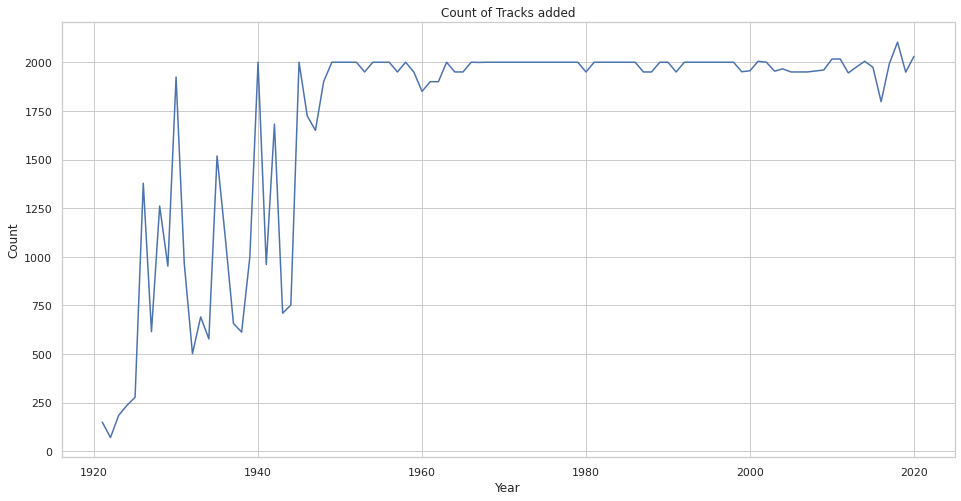

In [ ]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
x = df_main.groupby("year")["id"].count()
ax= sns.lineplot(x.index,x)
ax.set_title('Count of Tracks added')
ax.set_ylabel('Count')
ax.set_xlabel('Year')

Over the year, songs tend to have less acousticness. This makes sense cuz more and more music do not solely rely on instruments to produce sounds. Energy rose a lot over the years, people prefer more energetic party music today. Dancebility also showed some growth. Other characteristics seemed to remain more or less unchanged.

Text(0.5, 0, 'Year')

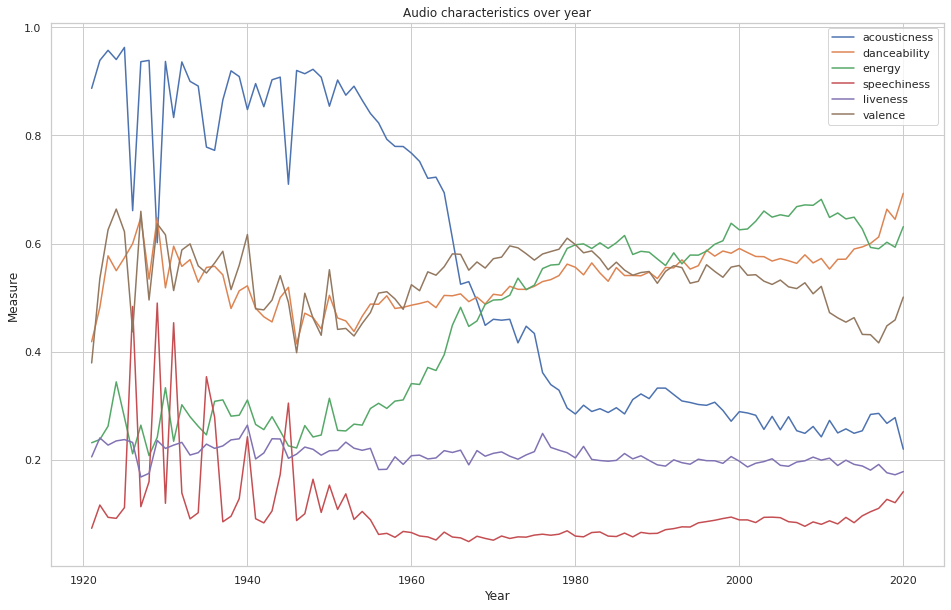

In [ ]:
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = df_main.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics over year')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')

## Popularity Over Year

Expectedly, recent songs are more popular :)

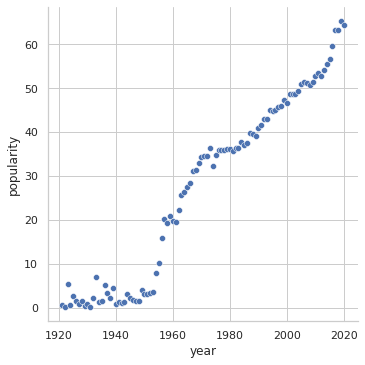

In [ ]:
sns.relplot(x="year", y="popularity", data=df_year)


# Part 2: Are the popular songs from the popular genre, artists or year? 
In the original dataframe, we have a song's popularity and its intrinsic characteristics, such as energy, acousticness, speechiness, etc. However, we don't see how a song's popularity relates to its corresponding artists' popularity, released year, and genre. In this section, we want to investigate those relationships.

## Merging multiple dataframes to get desired dataframe

In [ ]:
genre_to_popularity = dict(zip(df_by_genres.genres, df_by_genres.popularity))

In [ ]:
def genrelist_to_popularity(genres):
  ret = []
  for i in genres:
    ret.append(genre_to_popularity[i])
  return ret

In [ ]:
genre_temp = df_w_genres[['genres']]
genre_temp
a = (genre_temp.applymap(type) == list).all()
print (a)


genres    False
dtype: bool


In [ ]:
genre_temp['genres'] = genre_temp['genres'].apply(lambda x: toList(x))
#genre_temp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
genre_temp['genre_popularity'] = genre_temp['genres'].apply(lambda x: genrelist_to_popularity(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
genre_temp['genre_std'] = genre_temp['genre_popularity'].apply(lambda x: np.std(x))

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning:

Degrees of freedom <= 0 for slice

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
artist_to_genre = dict(zip(df_w_genres.artists, df_w_genres.genres))

In [ ]:
df_popular = df_main[['id', 'name', 'artists', 'year' ,'popularity']]

In [ ]:
artist_to_popularity = dict(zip(df_artist.artists,df_artist.popularity))

In [ ]:
def find_most_popular_artist(listOfNames):
  highest = -1
  for i in listOfNames:
    try:
      if artist_to_popularity[i] > highest:
        highest = artist_to_popularity[i]
    except:
      pass
  return highest

In [ ]:
df_popular['artists_popularity'] = df_popular['artists'].map(lambda x: find_most_popular_artist(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_popular.rename(columns={"popularity": "song_popularity"}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Popular artists
As we can see below, we can recognize a lot of the popular artists, such as BTS, Ariana Grande, and Cardi B. This is very different from the 'frequent' artist in the main dataframe above. Here, it ranks by popularity nowadaws, previously, it ranked by artists that appeared most frequently, regardless of whether they are popular or not.

In [ ]:
df_popular.sort_values('song_popularity', ascending = False)

,id,name,artists,year,song_popularity,artists_popularity
19611,47EiUVwUp4C9fGccaPuUCS,Dakiti,"[Bad Bunny, Jhay Cortez]",2020,100,70.209302
19606,3tjFYV6RSFtuktYl3ZtYcq,Mood (feat. iann dior),"[24kGoldn, iann dior]",2020,99,74.263158
19618,0t1kP63rueHleOhQkYSXFY,Dynamite,[BTS],2020,97,68.448029
19608,4Oun2ylbjFKMPTiaSbbCih,WAP (feat. Megan Thee Stallion),"[Cardi B, Megan Thee Stallion]",2020,96,71.689655
19610,35mvY5S1H3J2QZyna3TFe0,positions,[Ariana Grande],2020,96,68.698113
...,...,...,...,...,...,...
109919,3X2WPBNvwLXQ5bxop3ZeFG,Pictures at an Exhibition: Con mortuis in ling...,"[Modest Mussorgsky, William Kapell]",1945,0,6.161290
109920,3XQuNp2KXBAZWwyM5DeWds,Часть 38.2 - Триумфальная арка,[Эрих Мария Ремарк],1945,0,0.000000
109921,3XsEvDAb1fNAQ1kejK0KLz,Aai Musibat Sar Pe Bhaari,[Charlie],1945,0,14.000000
109922,3XwNVvuxklK3yXZWDUrEVE,Часть 14.3 & Часть 15.1 - Триумфальная арка,[Эрих Мария Ремарк],1945,0,0.000000


In [ ]:
year_to_popularity = dict(zip(df_year.year,df_year.popularity))

In [ ]:
df_popular['year_popularity'] = df_popular['year'].apply(lambda x: year_to_popularity[x])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
gen_to_popularity = dict(zip(df_w_genres.genres, df_w_genres.popularity))

In [ ]:
#df_popular['year_popularity']

In [ ]:
df_popular = df_popular.dropna()

In [ ]:
df_popular['main_artist'] = df_popular['artists'].apply(lambda x: x[0])

In [ ]:
def artist_convert(x):
  ret = ''
  try:
    ret = artist_to_genre[x]
    return ret
  except:
    return None
 

In [ ]:
df_popular_w_genre = df_popular
#df_popular_w_genre

In [ ]:
df_popular_w_genre['genre'] = df_popular['main_artist'].apply(lambda x: artist_convert(x))
df_popular_w_genre = df_popular_w_genre.dropna()

In [ ]:
g_to_popularity = dict(zip(df_by_genres.genres, df_by_genres.popularity))
def g_to_pop(x):
  ret = ''
  try:
    ret = g_to_popularity[x]
    return ret
  except:
    ret = None
    return ret

In [ ]:
df_popular_w_genre['genre_popularity'] = df_popular_w_genre['genre'].apply(lambda x: g_to_pop(x))
df_popular_w_genre['genre'] = df_popular_w_genre['genre'].apply(lambda x: toList(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_popular_w_genre['genre'] = df_popular_w_genre['genre'].apply(lambda x: genrelist_to_popularity(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_popular_w_genre['genre_popularity'] = df_popular_w_genre['genre'].apply(lambda x: np.mean(x))

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_popular_w_genre.dropna(inplace = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Artist Popularity vs Song Popularity**

Note: Should probably categorize by decade? theres not enough colors to show all the years here.

Text(0.5, 1.0, 'song popularity by artist popularity')

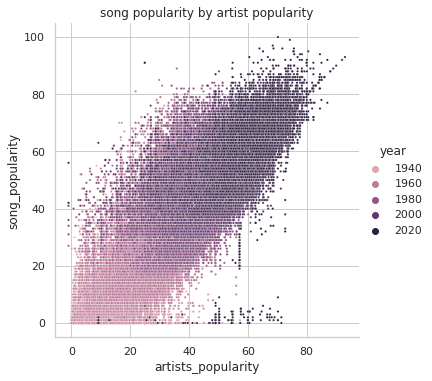

In [ ]:
sns.relplot(x= df_popular["artists_popularity"], y= df_popular["song_popularity"], hue= df_popular["year"], s=5);
plt.gca().set_title("song popularity by artist popularity")

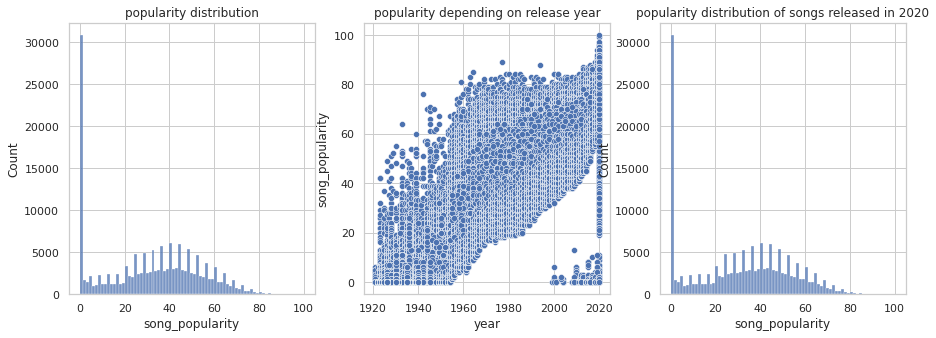

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.gca().set_title('popularity distribution')
sns.histplot(x=df_popular['song_popularity'])

plt.subplot(1,3,2)
plt.gca().set_title('popularity depending on release year')
sns.scatterplot(x=df_popular['year'], y=df_popular['song_popularity'])

plt.subplot(1,3,3)
plt.gca().set_title('popularity distribution of songs released in 2020')
df_2020 = df_popular[df_popular['year']==2020]
sns.histplot(x= df_popular["song_popularity"])

In [ ]:
df_2010_2019 = df_popular[df_popular['year'].isin([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])]

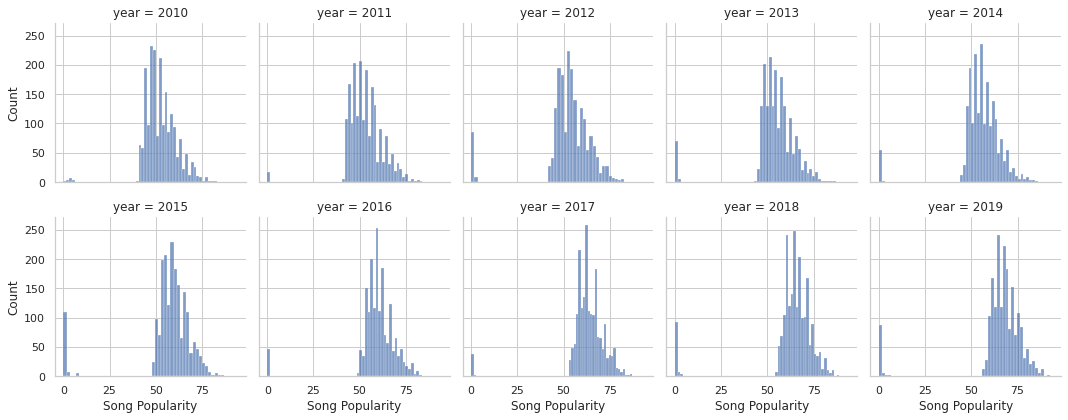

In [ ]:
g = sns.FacetGrid(df_2010_2019, col= "year", margin_titles=True, col_wrap=5)
g.map(sns.histplot, "song_popularity", alpha=.7)
g.set_axis_labels("Song Popularity", "Count")
g.fig.tight_layout()

###Pairwise Correlation b/w song popularity and its artist, genre,  year

Here, we graphed pairwise correlation b/w song popularity, artists popularity, genre popularity, and year popularity. In terms of correlation with song's popularity, we can see that year 

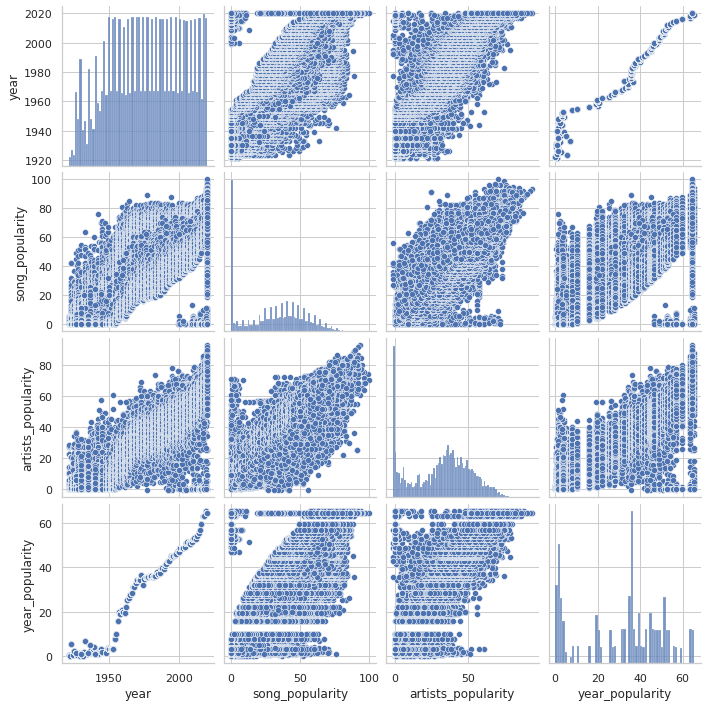

In [ ]:
sns.pairplot(df_popular)

## Predicting song's popularity based on its year, artist, and genre
Here, we try to predict a song's popularity based on its year, artists, and genre. This model fits training set well but not exactly the testing set. So, we will do more modeling later and try to improve accuracy

In [ ]:
df_popular = df_popular_w_genre[['id', 'name', 'artists', 'year', 'song_popularity', 'artists_popularity', 'year_popularity', 'genre_popularity']]

In [ ]:
df_popularity = df_popular[['song_popularity', 'artists_popularity', 'year_popularity', 'genre_popularity']]

In [ ]:
label = df_popularity['song_popularity']
features = df_popularity.drop(columns=['song_popularity'])

In [ ]:
from sklearn.model_selection import train_test_split
# Your code goes here
x_train, x_test, y_train, y_test = train_test_split(\
  features, label, test_size=0.20, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Your code goes here
rgr = LinearRegression()
rgr.fit(x_train, y_train)
y_pred = rgr.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

8.870110955008103

In [ ]:
r_sq = rgr.score(x_train, y_train)

In [ ]:
r_sq

0.814857966029197

In [ ]:
df_popular

,id,name,artists,year,song_popularity,artists_popularity,year_popularity,genre_popularity
0,4BJqT0PrAfrxzMOxytFOIz,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","[Sergei Rachmaninoff, James Levine, Berliner P...",1921,4,26.923529,0.653333,16.344076
6,5uNZnElqOS3W4fRmRYPk4T,The Wearing of the Green,[John McCormack],1921,4,1.600000,0.653333,0.942328
7,02GDntOXexBFUvSgaXLPkd,"Morceaux de fantaisie, Op. 3: No. 2, Prélude i...",[Sergei Rachmaninoff],1921,2,4.332090,0.653333,16.344076
8,05xDjWH9ub67nJJk82yfGf,La Mañanita - Remasterizado,[Ignacio Corsini],1921,0,0.031847,0.653333,8.717569
9,08zfJvRLp7pjAb94MA9JmF,Il Etait Syndiqué,[Fortugé],1921,0,0.000000,0.653333,1.968960
...,...,...,...,...,...,...,...,...
170648,0KkIkfsLEJbrcIhYsCL7L5,China,"[Anuel AA, Daddy Yankee, KAROL G, Ozuna, J Bal...",2020,72,71.362637,64.301970,60.084171
170649,0OStKKAuXlxA0fMH54Qs6E,Halloweenie III: Seven Days,[Ashnikko],2020,68,70.384615,64.301970,60.745909
170650,4BZXVFYCb76Q0Klojq4piV,AYA,[MAMAMOO],2020,76,73.400000,64.301970,64.213724
170651,5SiZJoLXp3WOl3J4C8IK0d,Darkness,[Eminem],2020,70,55.750000,64.301970,52.037114


# Part 3: What characteristics of songs themselves make them popular?!

In [ ]:
df_main.head(5)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,main_artist
0,0.0594,1921,0.982,"[Sergei Rachmaninoff, James Levine, Berliner P...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,Sergei Rachmaninoff
1,0.9630,1921,0.732,[Dennis Day],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,Dennis Day
2,0.0394,1921,0.961,[KHP Kridhamardawa Karaton Ngayogyakarta Hadin...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...
3,0.1650,1921,0.967,[Frank Parker],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,Frank Parker
4,0.2530,1921,0.957,[Phil Regan],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,Phil Regan


 Step 1:

---


Clean up the data by dropping data not relevant to the song itself. 
Repeatedly take log of the some of the numeric columns to make the number smaller and easier to work with.

In [ ]:
df_cleaned = df_main.drop(columns=['name', 'artists','year', 'release_date','id', 'main_artist'])

In [ ]:
df_cleaned['popularity'] = np.log(np.log([x+1 for x in df_cleaned['popularity']]) + 1) 

In [ ]:
df_cleaned['duration_ms'] = np.log(np.log([x+1 for x in df_cleaned['duration_ms']])+ 1) 
df_cleaned

,valence,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
0,0.0594,0.98200,0.279,2.683155,0.211,0,0.878000,10,0.6650,-20.096,1,0.959135,0.0366,80.954
1,0.9630,0.73200,0.819,2.572893,0.341,0,0.000000,7,0.1600,-12.441,1,1.026672,0.4150,60.936
2,0.0394,0.96100,0.328,2.647769,0.166,0,0.913000,3,0.1010,-14.850,1,1.026672,0.0339,110.339
3,0.1650,0.96700,0.275,2.584365,0.309,0,0.000028,5,0.3810,-9.316,1,0.869742,0.0354,100.109
4,0.2530,0.95700,0.418,2.566787,0.193,0,0.000002,3,0.2290,-10.096,1,0.741276,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,0.08460,0.786,2.611337,0.808,0,0.000289,7,0.0822,-3.702,1,1.665905,0.0881,105.029
170649,0.7340,0.20600,0.717,2.558989,0.753,0,0.000000,7,0.1010,-6.020,1,1.655196,0.0605,137.936
170650,0.6370,0.10100,0.634,2.584823,0.858,0,0.000009,4,0.2580,-2.226,0,1.675938,0.0809,91.688
170651,0.1950,0.00998,0.671,2.619458,0.623,1,0.000008,2,0.6430,-7.161,1,1.660640,0.3080,75.055


Step 2:
Distinguish between label and features and forming test data sets.


In [ ]:
label = df_cleaned['popularity']
features = df_cleaned.drop(columns=['popularity'])

In [ ]:
from sklearn.model_selection import train_test_split
# Your code goes here
x_train, x_test, y_train, y_test = train_test_split(\
  features, label, test_size=0.20, random_state=42)

In [ ]:
#x_train.drop(columns=['main_artist'], inplace = True)
x_train

,valence,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo
112871,0.8310,0.8520,0.536,2.549673,0.9580,0,0.025300,4,0.8330,-6.767,1,0.0387,92.152
149205,0.8500,0.3170,0.688,2.558639,0.5960,0,0.000000,7,0.0717,-9.967,1,0.0343,142.481
15097,0.1940,0.0377,0.252,2.629493,0.8490,0,0.005920,5,0.0545,-6.501,1,0.0581,163.704
130690,0.6130,0.2560,0.576,2.561201,0.7190,0,0.000446,8,0.1320,-8.432,1,0.0509,123.616
169206,0.4720,0.0484,0.492,2.588342,0.8460,0,0.000125,0,0.0768,-7.104,1,0.0670,99.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.1620,0.4940,0.260,2.616079,0.3280,0,0.000168,4,0.1100,-12.086,0,0.0342,91.374
103694,0.8620,0.3640,0.787,2.586115,0.8600,0,0.041000,1,0.0612,-4.974,1,0.0344,109.154
131932,0.6060,0.9770,0.494,2.635253,0.7430,0,0.390000,5,0.6430,-6.595,1,0.0906,113.276
146867,0.0402,0.9740,0.273,2.554946,0.0315,0,0.978000,11,0.1130,-25.332,1,0.0469,183.984


In [ ]:
y_train

112871    1.385227
149205    1.457646
15097     1.652403
130690    1.457646
169206    1.574565
            ...   
119879    1.574565
103694    1.565317
131932    1.408800
146867    1.489299
121958    1.560500
Name: popularity, Length: 136522, dtype: float64

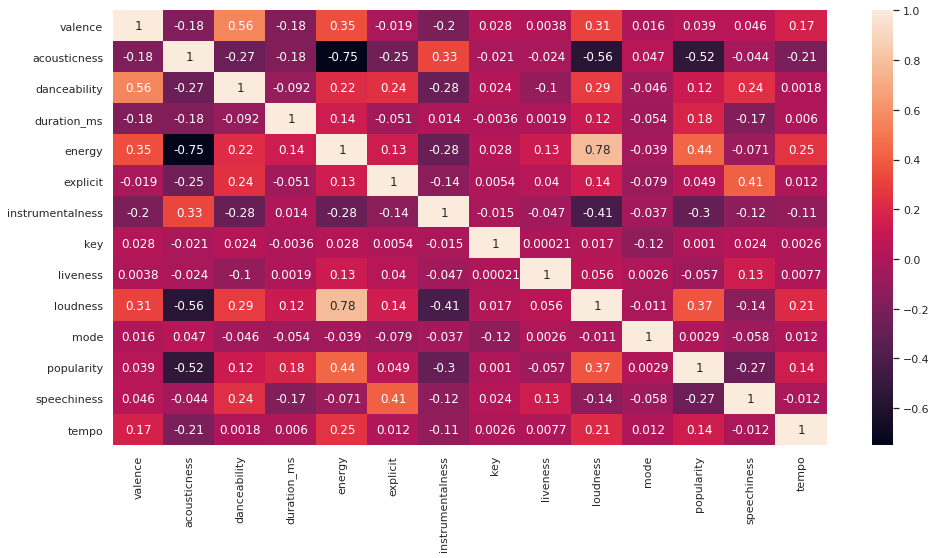

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = df_cleaned.corr()
sns.heatmap(corr,annot=True)

## Linear Regression
Step 3: Create a linear regression model.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Your code goes here
rgr = LinearRegression()
rgr.fit(x_train, y_train)
y_pred = rgr.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.45085983233162014

In [ ]:
r_sq = rgr.score(x_train, y_train)

In [ ]:
r_sq

0.39919570422762657

Step 4: Analyze with feature plays the biggest part on the song's popularity - normalized by the mean of those features as to one feature wouldn't be overlooked in its importance if the reason their coefficient is small is because their numbers are typically large.

In [ ]:
import math
importance = rgr.coef_
# summarize feature importance
feature_dict = dict()
for i,v in enumerate(importance):
  feature = features.columns[i]
  if (feature == 'duration_ms'):
    print(v)
  mean = features[feature].mean()
  feature_dict[feature] = abs(v)*abs(mean)

0.6978195196556134


In [ ]:
feature_by_weight = sorted(feature_dict.items(),key=lambda x: x[1])
feature_by_weight

[('key', 0.0030067613019704627),
 ('explicit', 0.005264408896453357),
 ('mode', 0.011437417849062475),
 ('liveness', 0.025521117599467083),
 ('instrumentalness', 0.06152731946330994),
 ('tempo', 0.08169367188769429),
 ('loudness', 0.1126005266591485),
 ('speechiness', 0.11406257038444485),
 ('valence', 0.16900636262950888),
 ('energy', 0.18018564860286015),
 ('danceability', 0.19521446169898715),
 ('acousticness', 0.28580127951295764),
 ('duration_ms', 1.8032079024254608)]

In [ ]:
feature_weight_df = pd.DataFrame(feature_by_weight, columns =['feature', 'weight']) 

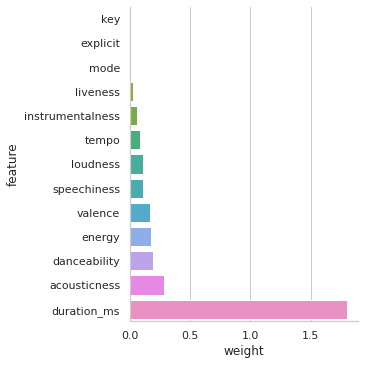

In [ ]:
sns.catplot(x="weight", y="feature", kind="bar", data=feature_weight_df)

Once we've identified the most important feature, which, surprisingly, is the duration of the song, we can see that it is significantly more important than all the other properties. Because of this, we can do the procedure for all the other features to gauge the effect differences of in songs' musical qualities have on its popularity.

In [ ]:
diff_features = features.drop(columns=[feature_by_weight[-1][0]])
xn_train, xn_test, yn_train, yn_test = train_test_split(\
  diff_features, label, test_size=0.20, random_state=42)
without_max_rgr = LinearRegression()
without_max_rgr.fit(xn_train, yn_train)
yn_pred = without_max_rgr.predict(xn_test)
np.sqrt(mean_squared_error(yn_test, yn_pred))

0.4514066771900406

In [ ]:
importance = without_max_rgr.coef_
# summarize feature importance
new_feature_dict = dict()
for i,v in enumerate(importance):
  feature = diff_features.columns[i]
  mean = diff_features[feature].mean()
  new_feature_dict[feature] = abs(v)*abs(mean)

In [ ]:
other_feature_by_weight = sorted(new_feature_dict.items(),key=lambda x: x[1])
other_feature_by_weight

[('key', 0.0032512123734360983),
 ('explicit', 0.004842903324709234),
 ('mode', 0.00971817712374375),
 ('liveness', 0.025075887382876978),
 ('instrumentalness', 0.06100837433602401),
 ('tempo', 0.08087674202286911),
 ('loudness', 0.10957699712129718),
 ('speechiness', 0.11592442806665634),
 ('valence', 0.17968088162836812),
 ('energy', 0.18139614173553711),
 ('danceability', 0.19687153364081963),
 ('acousticness', 0.2914052459831146)]

In [ ]:
other_feature_weight_df = pd.DataFrame(other_feature_by_weight, columns =['feature', 'weight']) 

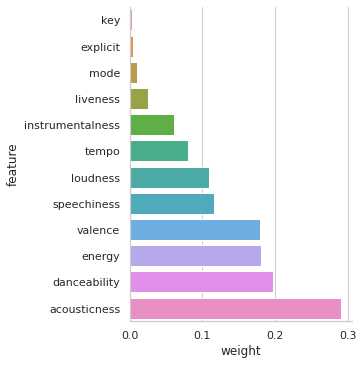

In [ ]:
sns.catplot(x="weight", y="feature", kind="bar", data=other_feature_weight_df)

Conclusion: it's interesting to see that all of a song's musical feature carry similar weight in determining the song's popularity. The longer the song is, the more popular it seems to be, and that seems to be pretty important. It certainly is a very curious observation.


In [ ]:
x_train_duration = x_train[["duration_ms"]]
x_test_duration = x_test[["duration_ms"]]

In [ ]:
x_train_duration

,duration_ms
112871,2.549673
149205,2.558639
15097,2.629493
130690,2.561201
169206,2.588342
...,...
119879,2.616079
103694,2.586115
131932,2.635253
146867,2.554946


In [ ]:
y_train

112871    1.385227
149205    1.457646
15097     1.652403
130690    1.457646
169206    1.574565
            ...   
119879    1.574565
103694    1.565317
131932    1.408800
146867    1.489299
121958    1.560500
Name: popularity, Length: 136522, dtype: float64

In [ ]:
duration_rgr = LinearRegression()
duration_rgr.fit(x_train_duration, yn_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

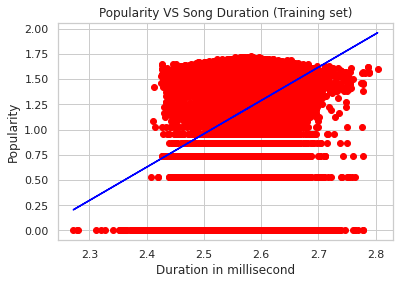

In [ ]:
# Visualizing the Training set results
viz_train = plt
viz_train.scatter(x_train_duration, y_train, color='red')
viz_train.plot(x_train_duration, duration_rgr.predict(x_train_duration), color='blue')
viz_train.title('Popularity VS Song Duration (Training set)')
viz_train.xlabel('Duration in millisecond')
viz_train.ylabel('Popularity')
viz_train.show()

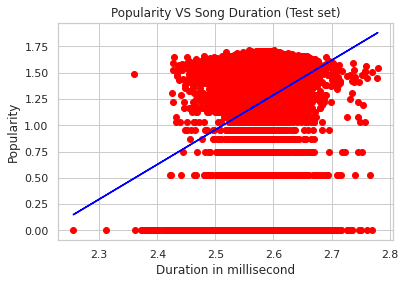

In [ ]:
# Visualizing the Test set results
viz_test = plt
viz_test.scatter(x_test_duration, y_test, color='red')
viz_test.plot(x_test_duration, duration_rgr.predict(x_test_duration), color='blue')
viz_test.title('Popularity VS Song Duration (Test set)')
viz_test.xlabel('Duration in millisecond')
viz_test.ylabel('Popularity')
viz_test.show()

## Principle Component Analysis (PCA)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12)
pca.fit(xn_train)

PCA(copy=True, iterated_power='auto', n_components=12, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
np.set_printoptions(suppress=True)
pca.explained_variance_ratio_

array([0.95535146, 0.03148505, 0.01252517, 0.00020919, 0.00012455,
       0.0000844 , 0.00007517, 0.00006709, 0.00003339, 0.0000189 ,
       0.00001507, 0.00001058])

In [ ]:
pc_vs_variance = np.cumsum(pca.explained_variance_ratio_)
px.area(
    x=range(1, pc_vs_variance.shape[0] + 1),
    y=pc_vs_variance,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [ ]:
pca = PCA(n_components=5)
pca.fit(x_train)
x_train = pca.transform(x_train)

In [ ]:
x_test = pca.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=140, max_depth=20)
forest.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=140, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred = forest.predict(x_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.4426368564893359

Alright, time to use computer to make music!! Let's try to optimize popularity!

This part does not work lol. Idk how to optimize output...

## Decision Tree

We then tried a different model - decision tree - to see if we can optimize the results.

We tried both a single run decision tree and one that loops for many iterations. 

In [ ]:
# single run
tree = DecisionTreeRegressor(max_leaf_nodes=41, min_samples_split=2000)
tree.fit(x_train, y_train)
y_train_pred = tree.predict(x_train).clip(0, 1)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
y_test_pred = tree.predict(x_test).clip(0, 1)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'train: {train_rmse}')
print(f'test: {test_rmse}')

train: 0.6012474423348475
test: 0.6029484438566547


In [ ]:
# loop
RMSE3_train, RMSE3_test = [], []

for i in range(2,200):
  tree = DecisionTreeRegressor(random_state = 15, max_leaf_nodes=i)
  tree.fit(x_train, y_train)
  y_train_pred = tree.predict(x_train).clip(0, 1)
  train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
  RMSE3_train.append(train_rmse.round(3))
  y_test_pred = tree.predict(x_test).clip(0, 1)
  test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
  RMSE3_test.append(test_rmse.round(3))

In [ ]:
print(f'train: {train_rmse}')
print(f'test: {test_rmse}')

train: 0.59501045826392
test: 0.6008423056652001


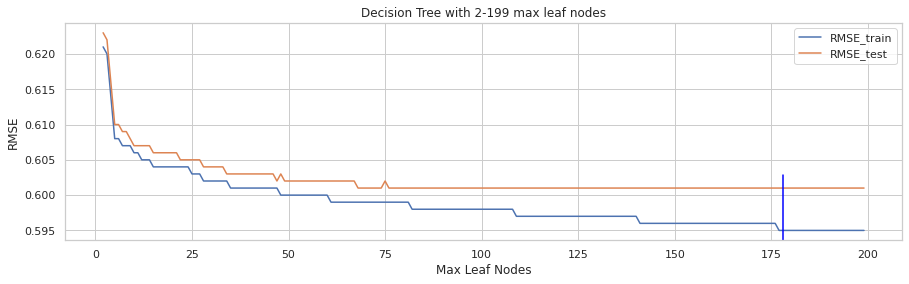

In [ ]:
fig, ax = plt.subplots(figsize=(15,4))
x = np.arange(2, 200)
ax = sns.lineplot(x=x, y=RMSE3_train)
sns.lineplot(x=x, y=RMSE3_test, ax=ax)
ax.axvline(x=178, ymin=0, ymax=0.3, color='blue')
ax.legend(labels=['RMSE_train', 'RMSE_test'], bbox_to_anchor=(1, 1))
ax.set_xlabel('Max Leaf Nodes')
ax.set_ylabel('RMSE')
ax.set_title('Decision Tree with 2-199 max leaf nodes')
plt.show()

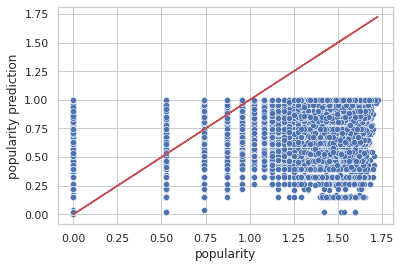

In [ ]:
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')
ax.set_ylabel('popularity prediction')
plt.show()

## KNN Model

Then, we decided to use the K-Nearest Neighbor model to see if we can optimize the predictions. 

Considering that K-Nearest Neighbors model usually has a very long running time, we sampled fractions of the original dataset.

**10 to 100 neighbors**

In [ ]:
RMSE1_train, RMSE1_test = [], []
  
for i in range(5,101,5):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(x_train,y_train)
  y_train_pred = knn.predict(x_train)
  knn_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
  RMSE1_train.append(knn_train_rmse.round(3))
  y_test_pred = knn.predict(x_test)
  knn_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
  RMSE1_test.append(knn_test_rmse.round(3))

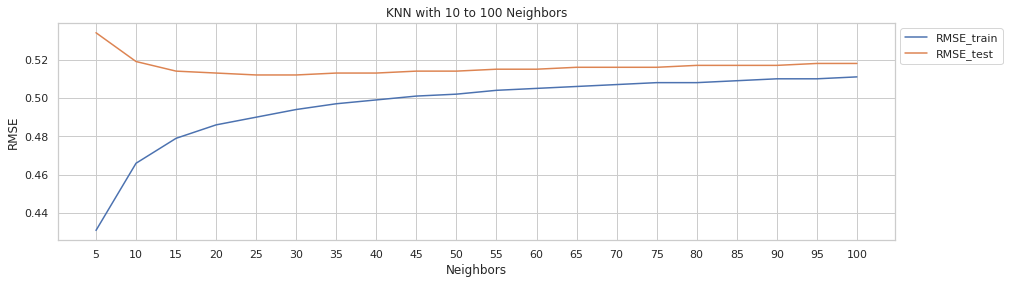

In [ ]:
fig, ax = plt.subplots(figsize=(15,4))
x = np.arange(5, 101, 5)
ax = sns.lineplot(x=x, y=RMSE1_train)
sns.lineplot(x=x, y=RMSE1_test, ax=ax)
ax.legend(labels=['RMSE_train', 'RMSE_test'], bbox_to_anchor=(1, 1))
ax.set_xlabel('Neighbors')
ax.set_ylabel('RMSE')
ax.set_xticks(np.arange(5,101,5))
ax.set_title('KNN with 10 to 100 Neighbors')
plt.show()

In [ ]:
gap1 = [RMSE1_test[num] - RMSE1_train[num] for num, i in enumerate(RMSE1_train)]
print(f'RMSE Train: {RMSE1_train [gap1.index(min(gap1))]}, RMSE_test: {RMSE1_test [gap1.index(min(gap1))]}')

RMSE Train: 0.51, RMSE_test: 0.517


**100 to 200 Neighbors**

In [ ]:
RMSE_train, RMSE_test = [], []
  
for i in range(100,201,5):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(x_train,y_train)
  y_train_pred = knn.predict(x_train)
  knn_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
  RMSE_train.append(knn_train_rmse.round(3))
  y_test_pred = knn.predict(x_test)
  knn_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
  RMSE_test.append(knn_test_rmse.round(3))

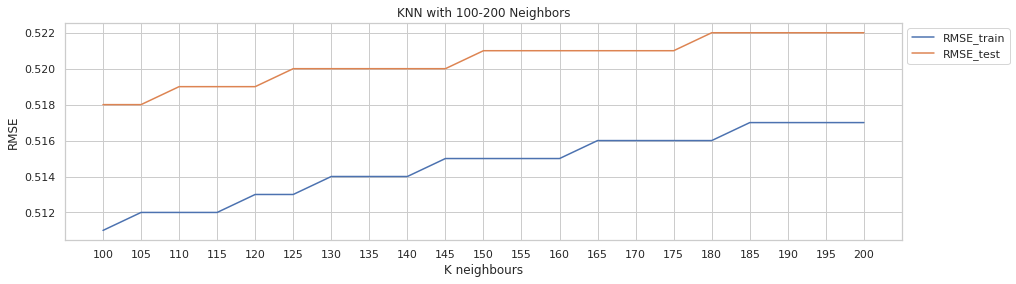

In [ ]:
fig, ax = plt.subplots(figsize=(15,4))
x = np.arange(100, 201, 5)
ax = sns.lineplot(x=x, y=RMSE_train)
sns.lineplot(x=x, y=RMSE_test, ax=ax)
ax.legend(labels=['RMSE_train', 'RMSE_test'], bbox_to_anchor=(1, 1))
ax.set_xticks(np.arange(100,201,5))
ax.set_xlabel('K neighbours')
ax.set_ylabel('RMSE')
ax.set_title('KNN with 100-200 Neighbors')
plt.show()

In [ ]:
gap2 = [RMSE_test[num]-RMSE_train[num] for num, i in enumerate(RMSE_train)]
print(f'RMSE Train: {RMSE_train[gap2.index(min(gap2))]}, RMSE_test: {RMSE_test[gap2.index(min(gap2))]}')

RMSE Train: 0.515, RMSE_test: 0.52


We can see that the RMSE of KNN is slightly better than Decision Tree. However, it is worse than our linear regression and PCA model.

# Part 4: Can we predict genres by "listening" to the song?

So, can we?
---
Obviously by listening I meant having my computer listen to its tempo, energy, instrumentalness. 
To give an overview of this part, we will start off by trying to predict the genere with all we have. Spoiler, the result is not great.
Then, we will try to narrow down the genre to see if that will give us better result. Another spoiler, not great either.


<Figure size 1152x576 with 0 Axes>

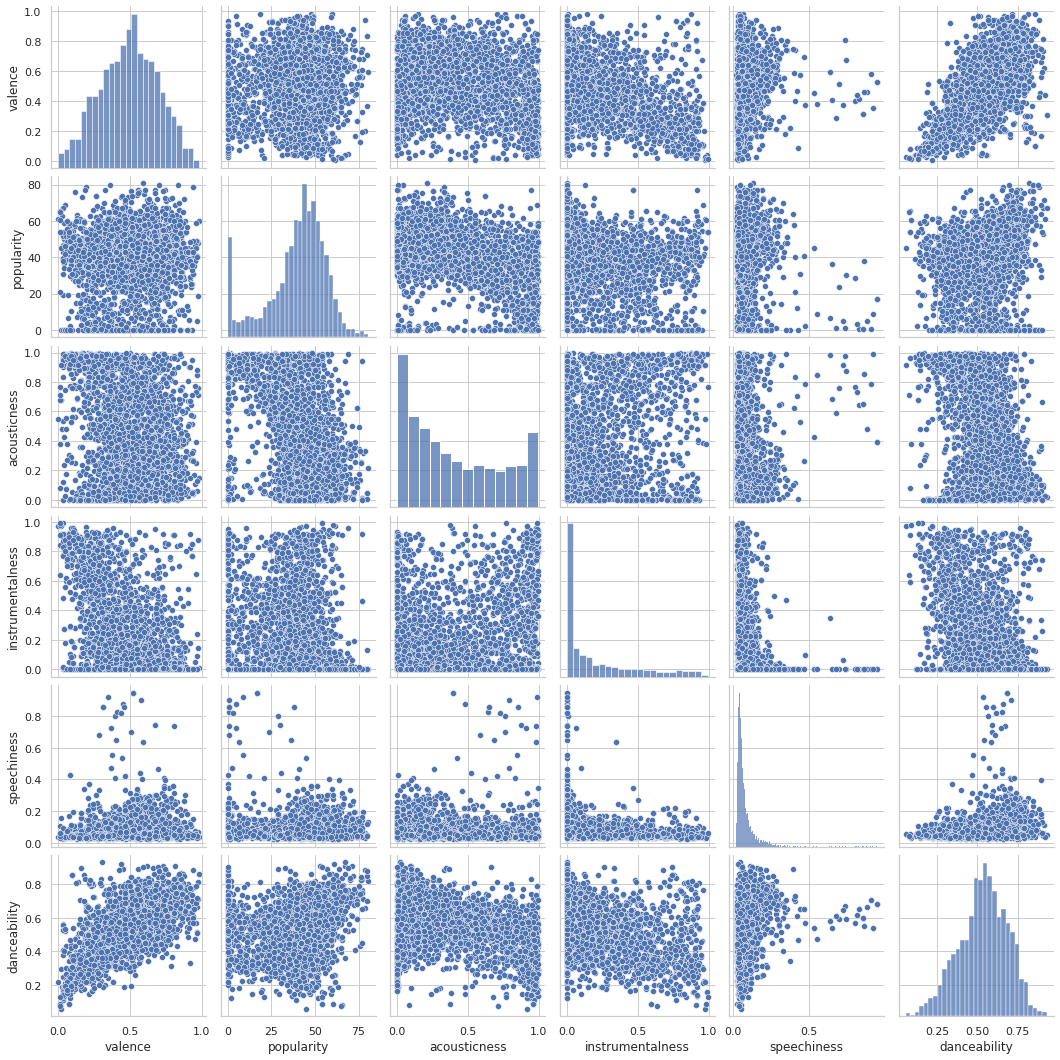

In [ ]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
cols = ["valence","popularity","acousticness","instrumentalness","speechiness","danceability" ]
sns.pairplot(df_by_genres[cols], height = 2.5 )
plt.show()

In [ ]:
df_w_genres

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28675,[],麥志誠,0.512000,0.356000,198773.000000,0.306000,0.008970,0.108000,-10.119000,0.027700,150.049000,0.328000,35.000000,10,1,2
28676,"['c-pop', 'classic cantopop', 'classic mandopo...",黃品源,0.541000,0.578000,293840.000000,0.334000,0.000006,0.067500,-11.974000,0.026700,135.934000,0.243000,48.000000,9,0,2
28677,[],黃國隆,0.785455,0.570818,174582.727273,0.148400,0.000083,0.142191,-21.610091,0.054355,119.586273,0.741273,23.000000,5,1,11
28678,"['chinese indie', 'chinese indie rock']",黑豹,0.381000,0.353000,316160.000000,0.686000,0.000000,0.056800,-9.103000,0.039500,200.341000,0.352000,35.000000,11,1,2


Let's start by just keeping the first genre as a list might be too much for sklearn to predict.

In [ ]:
parsed_genre = []
for gl in df_w_genres['genres']:
  res = gl.strip('][').split(', ')
  if len(res[0]) > 0:
    parsed_genre.append(res[0].strip('\''))
  else:
    parsed_genre.append('None')
df_clean_genre = df_w_genres.drop(columns=['genres'])
df_clean_genre['genre'] = parsed_genre

Oh man there are so many random genres. Let's see how many we have in total!!

In [ ]:
grouped_by_genre = df_clean_genre.groupby('genre')
len(grouped_by_genre)

1998

In [ ]:
features = df_clean_genre.drop(columns=['genre','artists','popularity'])
label = df_clean_genre['genre']
x_train, x_test, y_train, y_test = train_test_split(\
  features, label, test_size=0.20, random_state=20)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [ ]:
y_pred

array(['None', 'caucasian classical', 'banda', ..., 'indie pop',
       'alternative rock', 'irish fiddle'], dtype=object)

Since we are using the decision tree for the first time, I'm hoping to see how good it is. Ideally, the number of leaves should be around the number of genres (which is around 2000 as I found out earlier). However, we can see that we have way too many. This could very possibly be overfitting. 

In [ ]:
clf.get_n_leaves()

14088

In [ ]:
clf.score(x_test, y_test)

0.2163528591352859

We can see the accuracy score is pretty low, let's try a smaller max_depth to prevent overfitting!

In [ ]:
clf = DecisionTreeClassifier(max_depth=9)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.36297071129707115

In [ ]:
clf.get_n_leaves()

420

After testing for various max_depth, the best score I could get is 0.36 when max_depth=9, which is not great still. Let's try tuning with gridsearch!

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier(random_state=0)
depths = range(8, 20)
gs = GridSearchCV(estimator=clf, 
                  param_grid={'max_depth':depths})
gs.fit(x_train, y_train)
gs.score(x_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



0.3657601115760112

Still couldn't get great accuracy. Let's try other classifiers!

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb.score(x_test, y_test)

0.3274058577405858

In [ ]:
from sklearn.tree import ExtraTreeClassifier
etc = ExtraTreeClassifier(max_depth=9,splitter='best',random_state=0)
etc.fit(x_train, y_train)
etc.score(x_test, y_test)

0.34919804741980476

In [ ]:
etc.get_n_leaves()

391

As we can see, all the above classifiers gave us less than 0.4 accuracy. Let's look into how we can fix that!

Through testing various possible number of max_depth, we see that it is at the best score when max_depth=9 and produces less 400 leaves, suggesting that even though we have around 2000 genres, at least 35% of the songs are within 367 genres, and that's not counting all the ones that are in the 367 genres but mispredicted (and therefore not in the 35% of the correctly predicted songs). This discovery prompted me to hope to narrow down the genres and figure out some way to improve accuracy score.

### Does narrowing down the genre help??

I hypothesize by only having the popular genre and filter out songs with no genre, we can improve our classifier algorithm.

In [ ]:
df_w_genres

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28675,[],麥志誠,0.512000,0.356000,198773.000000,0.306000,0.008970,0.108000,-10.119000,0.027700,150.049000,0.328000,35.000000,10,1,2
28676,"['c-pop', 'classic cantopop', 'classic mandopo...",黃品源,0.541000,0.578000,293840.000000,0.334000,0.000006,0.067500,-11.974000,0.026700,135.934000,0.243000,48.000000,9,0,2
28677,[],黃國隆,0.785455,0.570818,174582.727273,0.148400,0.000083,0.142191,-21.610091,0.054355,119.586273,0.741273,23.000000,5,1,11
28678,"['chinese indie', 'chinese indie rock']",黑豹,0.381000,0.353000,316160.000000,0.686000,0.000000,0.056800,-9.103000,0.039500,200.341000,0.352000,35.000000,11,1,2


In [ ]:
from collections import defaultdict
all_genre = defaultdict(lambda: 0)

In [ ]:
for gl in df_w_genres['genres']:
  res = gl.strip('][').split(', ')
  for g in res:
    all_genre[g.strip('\'')] += 1

In [ ]:
frequency = sorted(all_genre.items(), key=lambda x: x[1])
frequency.reverse()
frequency[:1000]

[('', 9857),
 ('rock', 611),
 ('pop', 593),
 ('dance pop', 572),
 ('rap', 516),
 ('hip hop', 507),
 ('pop rap', 482),
 ('pop rock', 400),
 ('modern rock', 400),
 ('country rock', 394),
 ('urban contemporary', 383),
 ('folk rock', 381),
 ('latin', 380),
 ('soft rock', 372),
 ('trap', 361),
 ('mellow gold', 358),
 ('funk', 351),
 ('classic rock', 335),
 ('adult standards', 335),
 ('pop dance', 333),
 ('indie pop', 324),
 ('southern hip hop', 322),
 ('album rock', 322),
 ('alternative rock', 322),
 ('indie rock', 317),
 ('gangster rap', 312),
 ('alternative metal', 301),
 ('country', 299),
 ('regional mexican', 298),
 ('new wave pop', 298),
 ('soul', 296),
 ('r&b', 294),
 ('post-teen pop', 290),
 ('tropical', 286),
 ('quiet storm', 281),
 ('folk', 272),
 ('hard rock', 269),
 ('art rock', 269),
 ('dance rock', 265),
 ('classical performance', 260),
 ('roots rock', 259),
 ('edm', 256),
 ('brill building pop', 242),
 ('indie folk', 239),
 ('contemporary country', 238),
 ('electropop', 238),


As we can see, the biggest genre is " ". We can well imagine that it would skew our data because a song's lack of genre is not correlated to the song's musical qualities. Let's drop all of the songs with no genre.

In [ ]:
df_less_genre = df_w_genres[df_w_genres['genres'] != "[]"]
df_less_genre

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
8,"['comedy rock', 'comic', 'parody']","""Weird Al"" Yankovic",0.173145,0.662787,218948.196721,0.695393,0.000050,0.161102,-9.768705,0.084536,133.031180,0.751344,34.229508,9,1,122
9,"['emo rap', 'florida rap', 'sad rap', 'undergr...",$NOT,0.544467,0.789800,137910.466667,0.532933,0.023063,0.180300,-9.149267,0.293687,112.344800,0.480700,67.533333,1,1,15
10,"['dark trap', 'meme rap']",$atori Zoom,0.239000,0.883000,141519.000000,0.625000,0.000000,0.076500,-4.098000,0.245000,126.677000,0.871000,67.000000,6,1,2
12,"['asian american hip hop', 'cali rap', 'west c...",$tupid Young,0.148100,0.854000,190572.000000,0.683000,0.000002,0.188500,-6.997000,0.221000,100.724500,0.625500,57.500000,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28667,['classic cantopop'],陳麗斯,0.562000,0.550000,195013.000000,0.375000,0.000004,0.244000,-12.277000,0.033200,75.703000,0.405000,33.000000,0,1,2
28673,"['c-pop', 'classic mandopop', 'vintage chinese...",鳳飛飛,0.884000,0.358000,259387.000000,0.208000,0.000002,0.150000,-9.524000,0.033900,131.261000,0.278000,43.000000,10,1,2
28676,"['c-pop', 'classic cantopop', 'classic mandopo...",黃品源,0.541000,0.578000,293840.000000,0.334000,0.000006,0.067500,-11.974000,0.026700,135.934000,0.243000,48.000000,9,0,2
28678,"['chinese indie', 'chinese indie rock']",黑豹,0.381000,0.353000,316160.000000,0.686000,0.000000,0.056800,-9.103000,0.039500,200.341000,0.352000,35.000000,11,1,2


Now, we can simply keep the first 1000 genres as the 1000th genre only have 10 songs. Then we can clean our dataset that instead of saving the first genre, we save the genre with maximum frequency. If a song only has genres outside of the 1000 frequent genre, we can set it to none and drop it later. 

In [ ]:
popular_genres = set([x[0] for x in frequency[:1000]])
parsed = []
for gl in df_less_genre['genres']:
  res = gl.strip('][').split(', ')
  curr_max = res[0].strip('\'')
  popular = False
  for g in res:
    curr = g.strip('\'')
    if all_genre[curr] >= all_genre[curr_max]:
      if curr in popular_genres:
        popular = True
      curr_max = curr
  if not popular:
    curr_max = ''
  parsed.append(curr_max)

df_less_genre['genre']=parsed
df_less_genre=df_less_genre[df_less_genre['genre']!='']
df_less_genre=df_less_genre.drop(columns=['genres'])
df_less_genre

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genre
0,"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9,show tunes
8,"""Weird Al"" Yankovic",0.173145,0.662787,218948.196721,0.695393,0.000050,0.161102,-9.768705,0.084536,133.031180,0.751344,34.229508,9,1,122,comic
9,$NOT,0.544467,0.789800,137910.466667,0.532933,0.023063,0.180300,-9.149267,0.293687,112.344800,0.480700,67.533333,1,1,15,underground hip hop
10,$atori Zoom,0.239000,0.883000,141519.000000,0.625000,0.000000,0.076500,-4.098000,0.245000,126.677000,0.871000,67.000000,6,1,2,dark trap
12,$tupid Young,0.148100,0.854000,190572.000000,0.683000,0.000002,0.188500,-6.997000,0.221000,100.724500,0.625500,57.500000,1,1,2,cali rap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28666,陳蘭麗,0.502000,0.609000,152883.000000,0.833000,0.000000,0.134000,-6.261000,0.215000,154.596000,0.718000,35.000000,0,1,2,taiwan campus folk
28667,陳麗斯,0.562000,0.550000,195013.000000,0.375000,0.000004,0.244000,-12.277000,0.033200,75.703000,0.405000,33.000000,0,1,2,classic cantopop
28673,鳳飛飛,0.884000,0.358000,259387.000000,0.208000,0.000002,0.150000,-9.524000,0.033900,131.261000,0.278000,43.000000,10,1,2,c-pop
28676,黃品源,0.541000,0.578000,293840.000000,0.334000,0.000006,0.067500,-11.974000,0.026700,135.934000,0.243000,48.000000,9,0,2,c-pop


In [ ]:
features = df_less_genre.drop(columns=['genre','artists','popularity'])
label = df_less_genre['genre']
x_train, x_test, y_train, y_test = train_test_split(\
  features, label, test_size=0.20, random_state=20)

In [ ]:
etc = ExtraTreeClassifier(max_depth=16,splitter='best')
etc.fit(x_train, y_train)
etc.score(x_test, y_test)

0.11073253833049404

Clearly the hypothesis is incorrect. Narrowing down the genres to popular ones significantly lowered the accuracy the same classifiers.

Possible reasons:


1.   The songs in uncommon genres is easily identifiable and distinguishable from the other songs. At every split, they are easily put into a separate group which made it easier to place the songs in the popular group. That is, by eliminating songs in uncommon genres, the popular genres are similar to each other and therefore making it less likely for our classifier to identify them separately.
2.   Since we eliminated quite a number of songs, we dwindled down the size of our dataset in general, making our classifier having to train with less data and therefore less accuracy. 



##Conclusion
Even though we couldn't get great score for our prediction. However, we need to keep in mind that differences between genres might be really really small. If we are able to group together genres, that could very possibly lead to better result. Since none of our team is a music expert, we weren't sure if we should group together Chinese Indie with Korean Indie or Chinese pop with Chinese Indie. All in all, I believe that we could predict a genre with the qualities a music has. 36% accuracy is pretty well given our rather naive approach!